<a href="https://colab.research.google.com/github/Miftakhull/Kmeans/blob/main/Kmeans_Klustering_Gizi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Load libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.cluster import KMeans
from warnings import filterwarnings

## Set visualisation thema
plt.style.use("ggplot")
filterwarnings("ignore")

In [2]:
# Load dataset
data = pd.read_csv("/content/data2.csv", sep=";")
data =  data.head(20) # Syncronize total sampling data according section 3.
data

,Data,Nama,Umur,TB,BB
0,1,FAIKH SETIAWAN,10,161,57
1,2,RIRIN MAHMUDA,15,175,89
2,3,ANGGITA NAVA QUDSIYAH,10,154,45
3,4,YOHAN SETIAWAN,15,169,104
4,5,MAUlIDIYAH,16,178,72
5,6,LAILATUL MAGHFIROH,14,157,38
6,7,FAHRI HUSEINI,18,176,98
7,8,CHOTIMAH HANIM,11,160,62
8,9,SUWANTIYONO,19,182,115
9,10,DWI IKA WAHYUNI,11,151,33


In [3]:
# Check data dimension
data.shape

(20, 5)

In [4]:
# Check missing value on dataset
data.isna().sum()

Data    0
Nama    0
Umur    0
TB      0
BB      0
dtype: int64

In [5]:
# Check statistic information
data.describe()

,Data,Umur,TB,BB
count,20.00000,20.000000,20.00000,20.000000
mean,10.50000,14.050000,165.20000,72.300000
std,5.91608,2.999561,12.58487,27.883404
min,1.00000,10.000000,130.00000,33.000000
25%,5.75000,11.000000,157.75000,48.000000
50%,10.50000,15.000000,166.50000,69.500000
75%,15.25000,16.000000,175.25000,94.250000
max,20.00000,19.000000,182.00000,120.000000


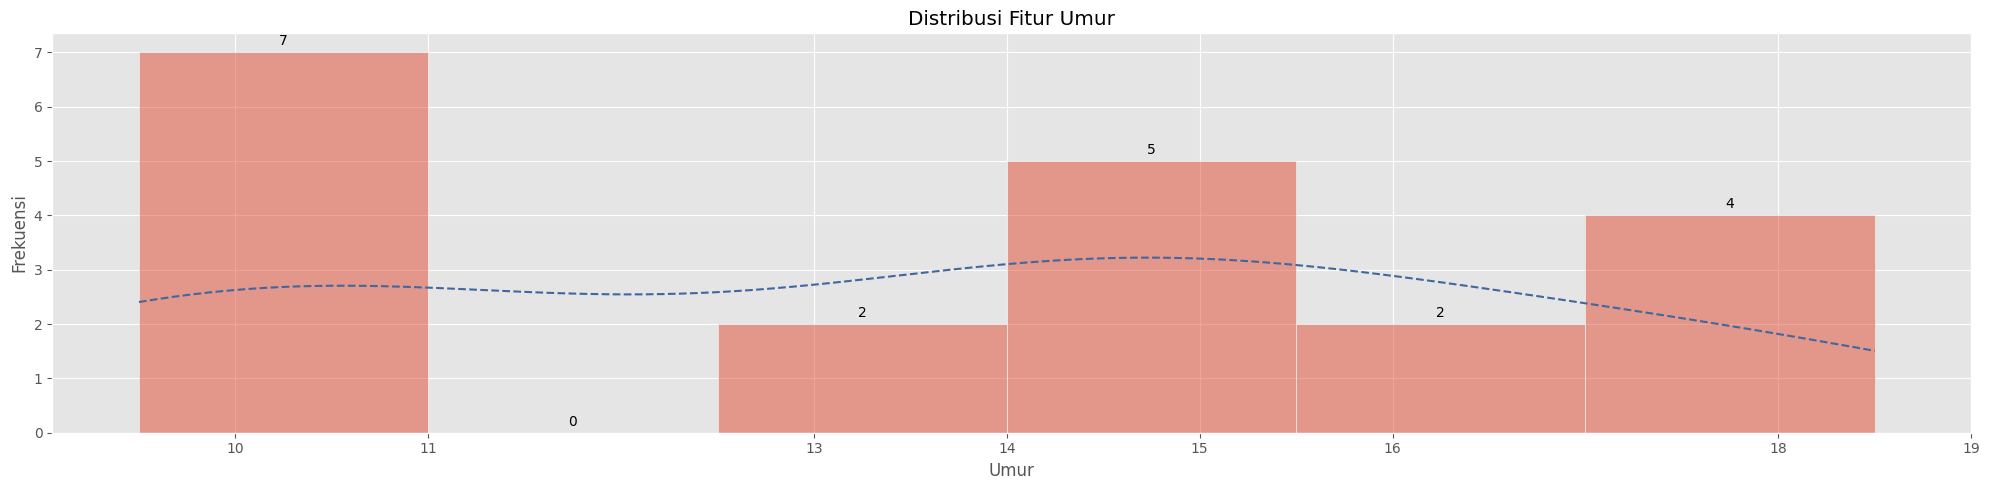

In [6]:
# Plot the histogram
feature = "Umur"
fig, ax = plt.subplots(figsize=(20, 5))
sns.histplot(data=data[feature], ax=ax, kde=True, stat='count')

# Customize the KDE line
kde_line = ax.lines[-1]
kde_line.set_linestyle('--')
kde_line.set_color('#40679E')

# Add text labels to each bar
for rect in ax.patches:
    height = rect.get_height()
    ax.annotate(f'{int(height)}',
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),
                textcoords='offset points',
                ha='center', va='bottom')

# Re-define variant of feature numeric
unique_values = np.sort(data[feature].unique())
xtick_position = unique_values + 0.5

# Adjust the layout and formatting
ax.set_title('Distribusi Fitur Umur')
ax.set_xlabel('Umur')
ax.set_ylabel('Frekuensi')
ax.set_xticks(xtick_position)
ax.set_xticklabels(unique_values)
plt.tight_layout()
plt.show()

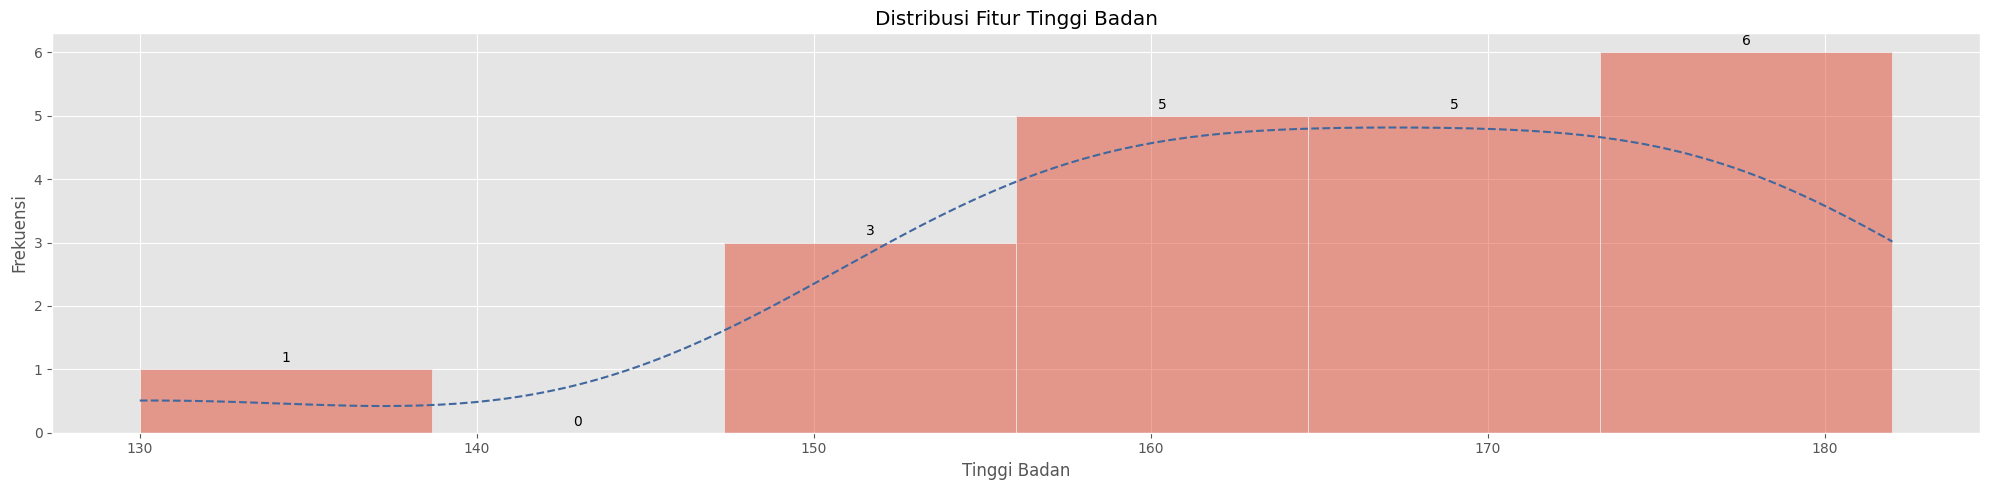

In [7]:
# Plot the histogram
feature = "TB"
fig, ax = plt.subplots(figsize=(20, 5))
sns.histplot(data=data[feature], ax=ax, kde=True, stat='count')

# Customize the KDE line
kde_line = ax.lines[-1]
kde_line.set_linestyle('--')
kde_line.set_color('#40679E')

# Add text labels to each bar
for rect in ax.patches:
    height = rect.get_height()
    ax.annotate(f'{int(height)}',
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),
                textcoords='offset points',
                ha='center', va='bottom')

# Adjust the layout and formatting
ax.set_title('Distribusi Fitur Tinggi Badan')
ax.set_xlabel('Tinggi Badan')
ax.set_ylabel('Frekuensi')
plt.tight_layout()
plt.show()

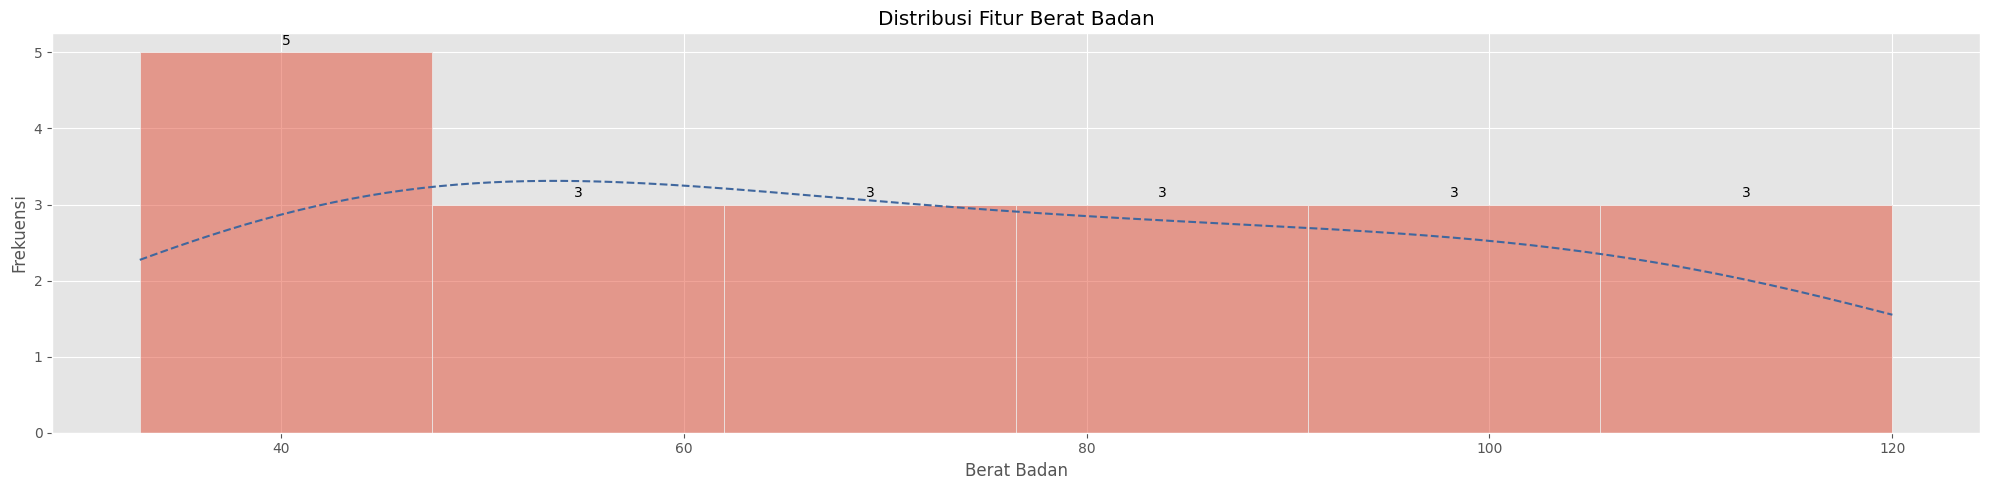

In [8]:
# Plot the histogram
feature = "BB"
fig, ax = plt.subplots(figsize=(20, 5))
sns.histplot(data=data[feature], ax=ax, kde=True, stat='count')

# Customize the KDE line
kde_line = ax.lines[-1]
kde_line.set_linestyle('--')
kde_line.set_color('#40679E')

# Add text labels to each bar
for rect in ax.patches:
    height = rect.get_height()
    ax.annotate(f'{int(height)}',
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),
                textcoords='offset points',
                ha='center', va='bottom')

# Adjust the layout and formatting
ax.set_title('Distribusi Fitur Berat Badan')
ax.set_xlabel('Berat Badan')
ax.set_ylabel('Frekuensi')
plt.tight_layout()
plt.show()

In [9]:
def corrfunc(x, y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    ax.annotate(f'ρ = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)

<Figure size 1000x1000 with 0 Axes>

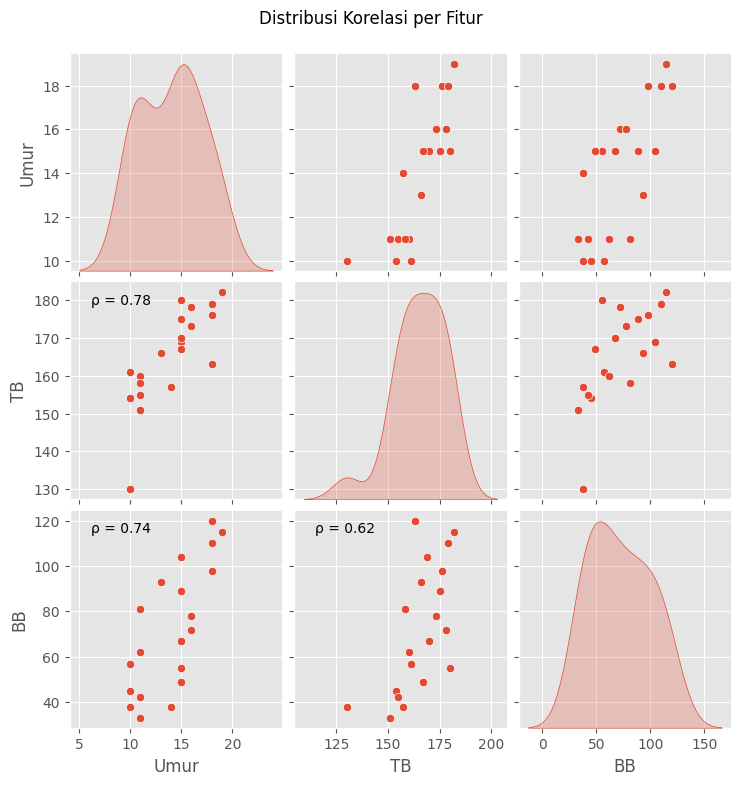

In [10]:
# Re-define data feature used for visualisation
scope_data = data[['Umur', 'TB', 'BB']]

# Create a pairplot with only scatter plots
plt.figure(figsize=(10, 10))
grid = sns.pairplot(scope_data, kind='scatter', diag_kind='kde', corner=False)
grid.fig.suptitle("Distribusi Korelasi per Fitur", y=1.04)
grid.map_lower(corrfunc)
plt.show()

Weight Transformation Mapping

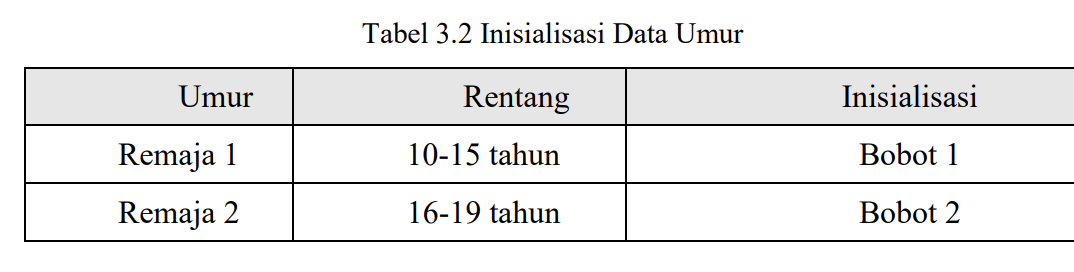

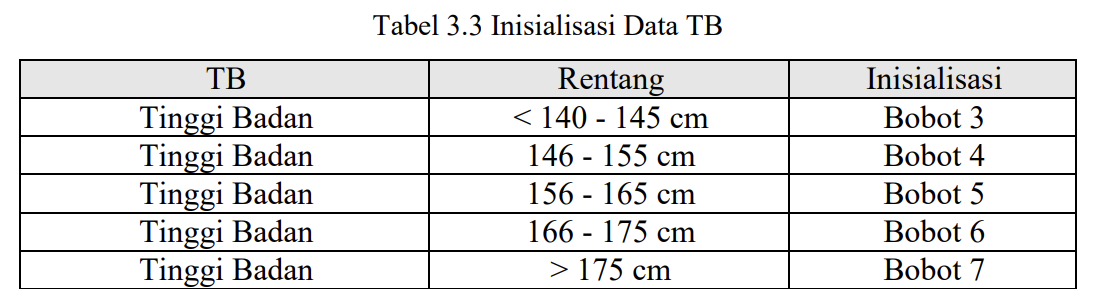

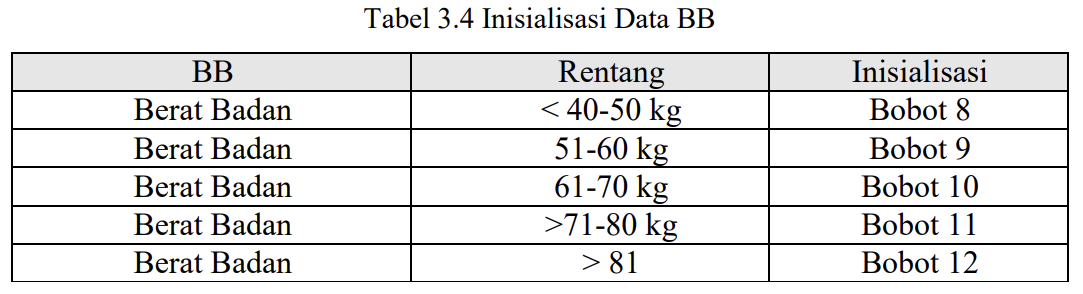

```md
note: untuk 'BB' dengan rentang >81 sebaiknya diganti ke >80. karena terlihat adanya perbedaan hasil antara transformasi di excel dengan di python (contoh: bisa liat 'SAIFUI ANWAR' di kolom 'Nama')
```

In [11]:
def transform_umur(umur: int) -> int:
    return 1 if umur in range(10, 16) else 2

def transform_height(height: int) -> int:
    score = 7 # the last option height score
    if height <= 140 or height in range(140, 146):
        score = 3
    elif height in range(146, 156):
        score = 4
    elif height in range(156, 166):
        score = 5
    elif height in range(166, 176):
        score = 6
    return score

def transform_weight(weight: int) -> int:
    score = 12 # the last option weight score
    if weight <= 40 or weight in range(40, 51):
        score = 8
    elif weight in range(51, 61):
        score = 9
    elif weight in range(61, 71):
        score = 10
    elif weight in range(71, 81):
        score = 11
    return score

In [12]:
# Transform Dataset

## Convert feature numeric into discrete according mentioned methodology
data['weight_umur'] = data['Umur'].apply(transform_umur)
data['weight_height'] = data['TB'].apply(transform_height)
data['weight_weight'] = data['BB'].apply(transform_weight)

In [13]:
# Overview Transformation data result - required in-depth manual checking
df_selected = data.copy()
df_selected

,Data,Nama,Umur,TB,BB,weight_umur,weight_height,weight_weight
0,1,FAIKH SETIAWAN,10,161,57,1,5,9
1,2,RIRIN MAHMUDA,15,175,89,1,6,12
2,3,ANGGITA NAVA QUDSIYAH,10,154,45,1,4,8
3,4,YOHAN SETIAWAN,15,169,104,1,6,12
4,5,MAUlIDIYAH,16,178,72,2,7,11
5,6,LAILATUL MAGHFIROH,14,157,38,1,5,8
6,7,FAHRI HUSEINI,18,176,98,2,7,12
7,8,CHOTIMAH HANIM,11,160,62,1,5,10
8,9,SUWANTIYONO,19,182,115,2,7,12
9,10,DWI IKA WAHYUNI,11,151,33,1,4,8


<Figure size 1000x1000 with 0 Axes>

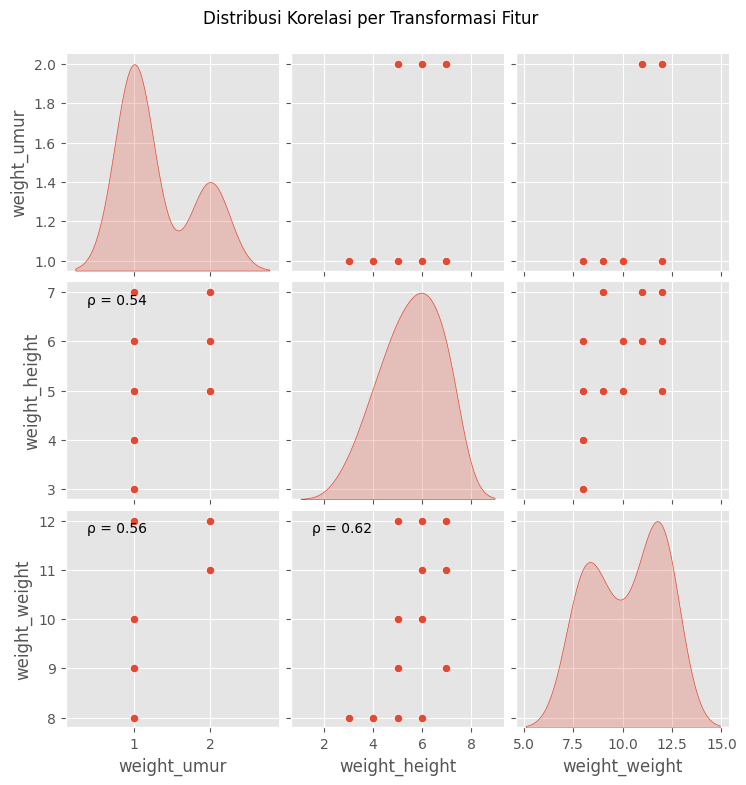

In [14]:
# Re-define data feature used for visualisation
scope_data = df_selected[['weight_umur', 'weight_height', 'weight_weight']]

# Create a pairplot with only scatter plots
plt.figure(figsize=(10, 10))
grid = sns.pairplot(scope_data, kind='scatter', diag_kind='kde', corner=False)
grid.fig.suptitle("Distribusi Korelasi per Transformasi Fitur", y=1.04)
grid.map_lower(corrfunc)
plt.show()

In [15]:
# Define feature used for cluster modeling
features = ['weight_umur', 'weight_height', 'weight_weight']

In [16]:
# Define KMeans algorithm with defined n_clusters=5
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(df_selected[features])

KMeans(n_clusters=5, random_state=0)

In [17]:
# Check each cluster centroid
cluster_centroid_result = pd.DataFrame.from_records(kmeans.cluster_centers_)
cluster_centroid_result.columns = list(map(lambda i: f'centroid_coordinate_of_{i}', features))
cluster_centroid_result.insert(loc=0, column='cluster_label', value=list(map(lambda i: f'C{i + 1}', range(5))))

# Preview result
cluster_centroid_result

,cluster_label,centroid_coordinate_of_weight_umur,centroid_coordinate_of_weight_height,centroid_coordinate_of_weight_weight
0,C1,1.0,4.000000,8.000000
1,C2,2.0,6.800000,11.600000
2,C3,1.0,5.333333,9.666667
3,C4,1.0,6.500000,8.500000
4,C5,1.2,5.600000,12.000000


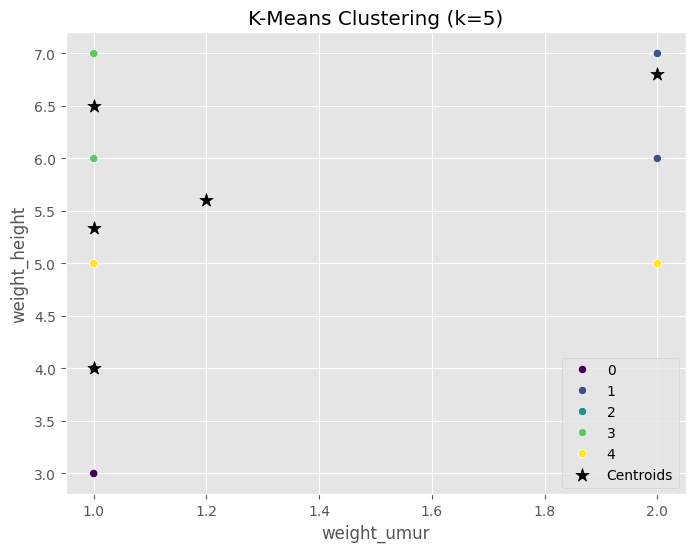

In [18]:
# Get cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Visualize the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_selected['weight_umur'], y=df_selected['weight_height'], hue=labels, palette='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], s=100, marker='*', c='k', label='Centroids')
plt.title(f'K-Means Clustering (k={5})')
plt.xlabel('weight_umur')
plt.ylabel('weight_height')
plt.legend()
plt.show()

<Figure size 1000x1000 with 0 Axes>

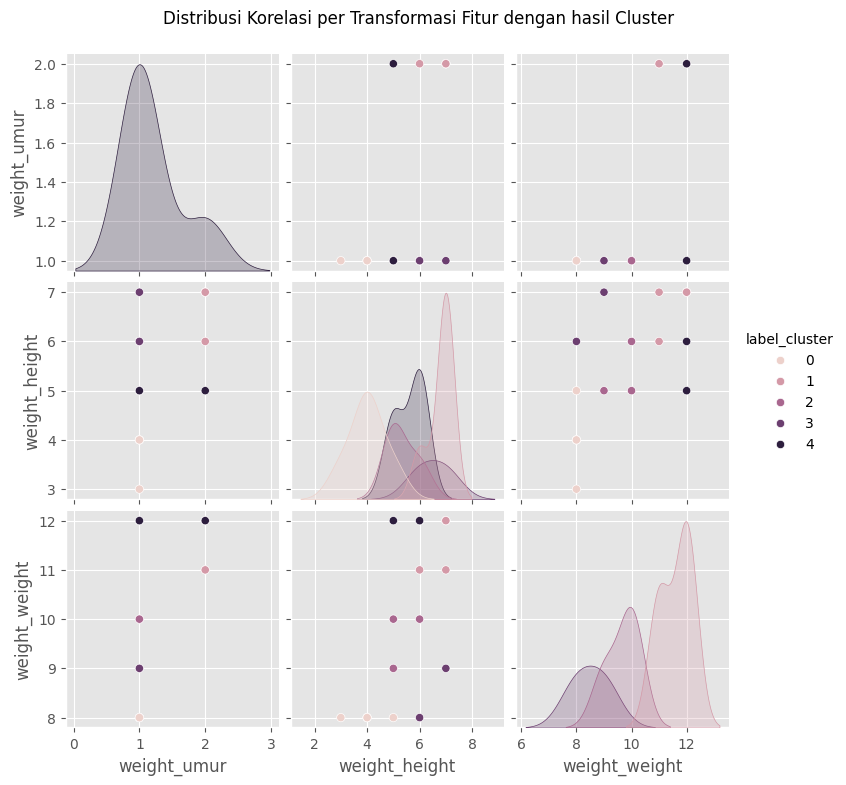

In [19]:
# Re-define data feature used for visualisation
scope_data = df_selected[['weight_umur', 'weight_height', 'weight_weight']]
scope_data['label_cluster'] = labels

# Create a pairplot with only scatter plots
plt.figure(figsize=(10, 10))
grid = sns.pairplot(scope_data, kind='scatter', diag_kind='kde', corner=False, hue="label_cluster")
grid.fig.suptitle("Distribusi Korelasi per Transformasi Fitur dengan hasil Cluster", y=1.04)
# grid.map_lower(corrfunc) # this function generate duplicate pearson coef. score due we have several cluster label order.
plt.show()

In [20]:
# Calculate the distance of each data point from the cluster centroids
distances = []
for i in range(len(df_selected)):
    point = df_selected[features].iloc[i].values
    distances.append([np.linalg.norm(point - centroid) for centroid in centroids])

In [21]:
# Wrap result
data_result = data.copy()
data_result[['C1', 'C2', 'C3', 'C4', 'C5']] = distances
data_result['label_cluster'] = labels

In [22]:
# Preview final result
data_result

,Data,Nama,Umur,TB,BB,weight_umur,weight_height,weight_weight,C1,C2,C3,C4,C5,label_cluster
0,1,FAIKH SETIAWAN,10,161,57,1,5,9,1.414214,3.316625,0.745356,1.581139,3.065942,2
1,2,RIRIN MAHMUDA,15,175,89,1,6,12,4.472136,1.341641,2.426703,3.535534,0.447214,4
2,3,ANGGITA NAVA QUDSIYAH,10,154,45,1,4,8,0.000000,4.669047,2.134375,2.549510,4.312772,0
3,4,YOHAN SETIAWAN,15,169,104,1,6,12,4.472136,1.341641,2.426703,3.535534,0.447214,4
4,5,MAUlIDIYAH,16,178,72,2,7,11,4.358899,0.632456,2.357023,2.738613,1.897367,1
5,6,LAILATUL MAGHFIROH,14,157,38,1,5,8,1.000000,4.147288,1.699673,1.581139,4.049691,0
6,7,FAHRI HUSEINI,18,176,98,2,7,12,5.099020,0.447214,3.036811,3.674235,1.612452,1
7,8,CHOTIMAH HANIM,11,160,62,1,5,10,2.236068,2.607681,0.471405,2.121320,2.097618,2
8,9,SUWANTIYONO,19,182,115,2,7,12,5.099020,0.447214,3.036811,3.674235,1.612452,1
9,10,DWI IKA WAHYUNI,11,151,33,1,4,8,0.000000,4.669047,2.134375,2.549510,4.312772,0


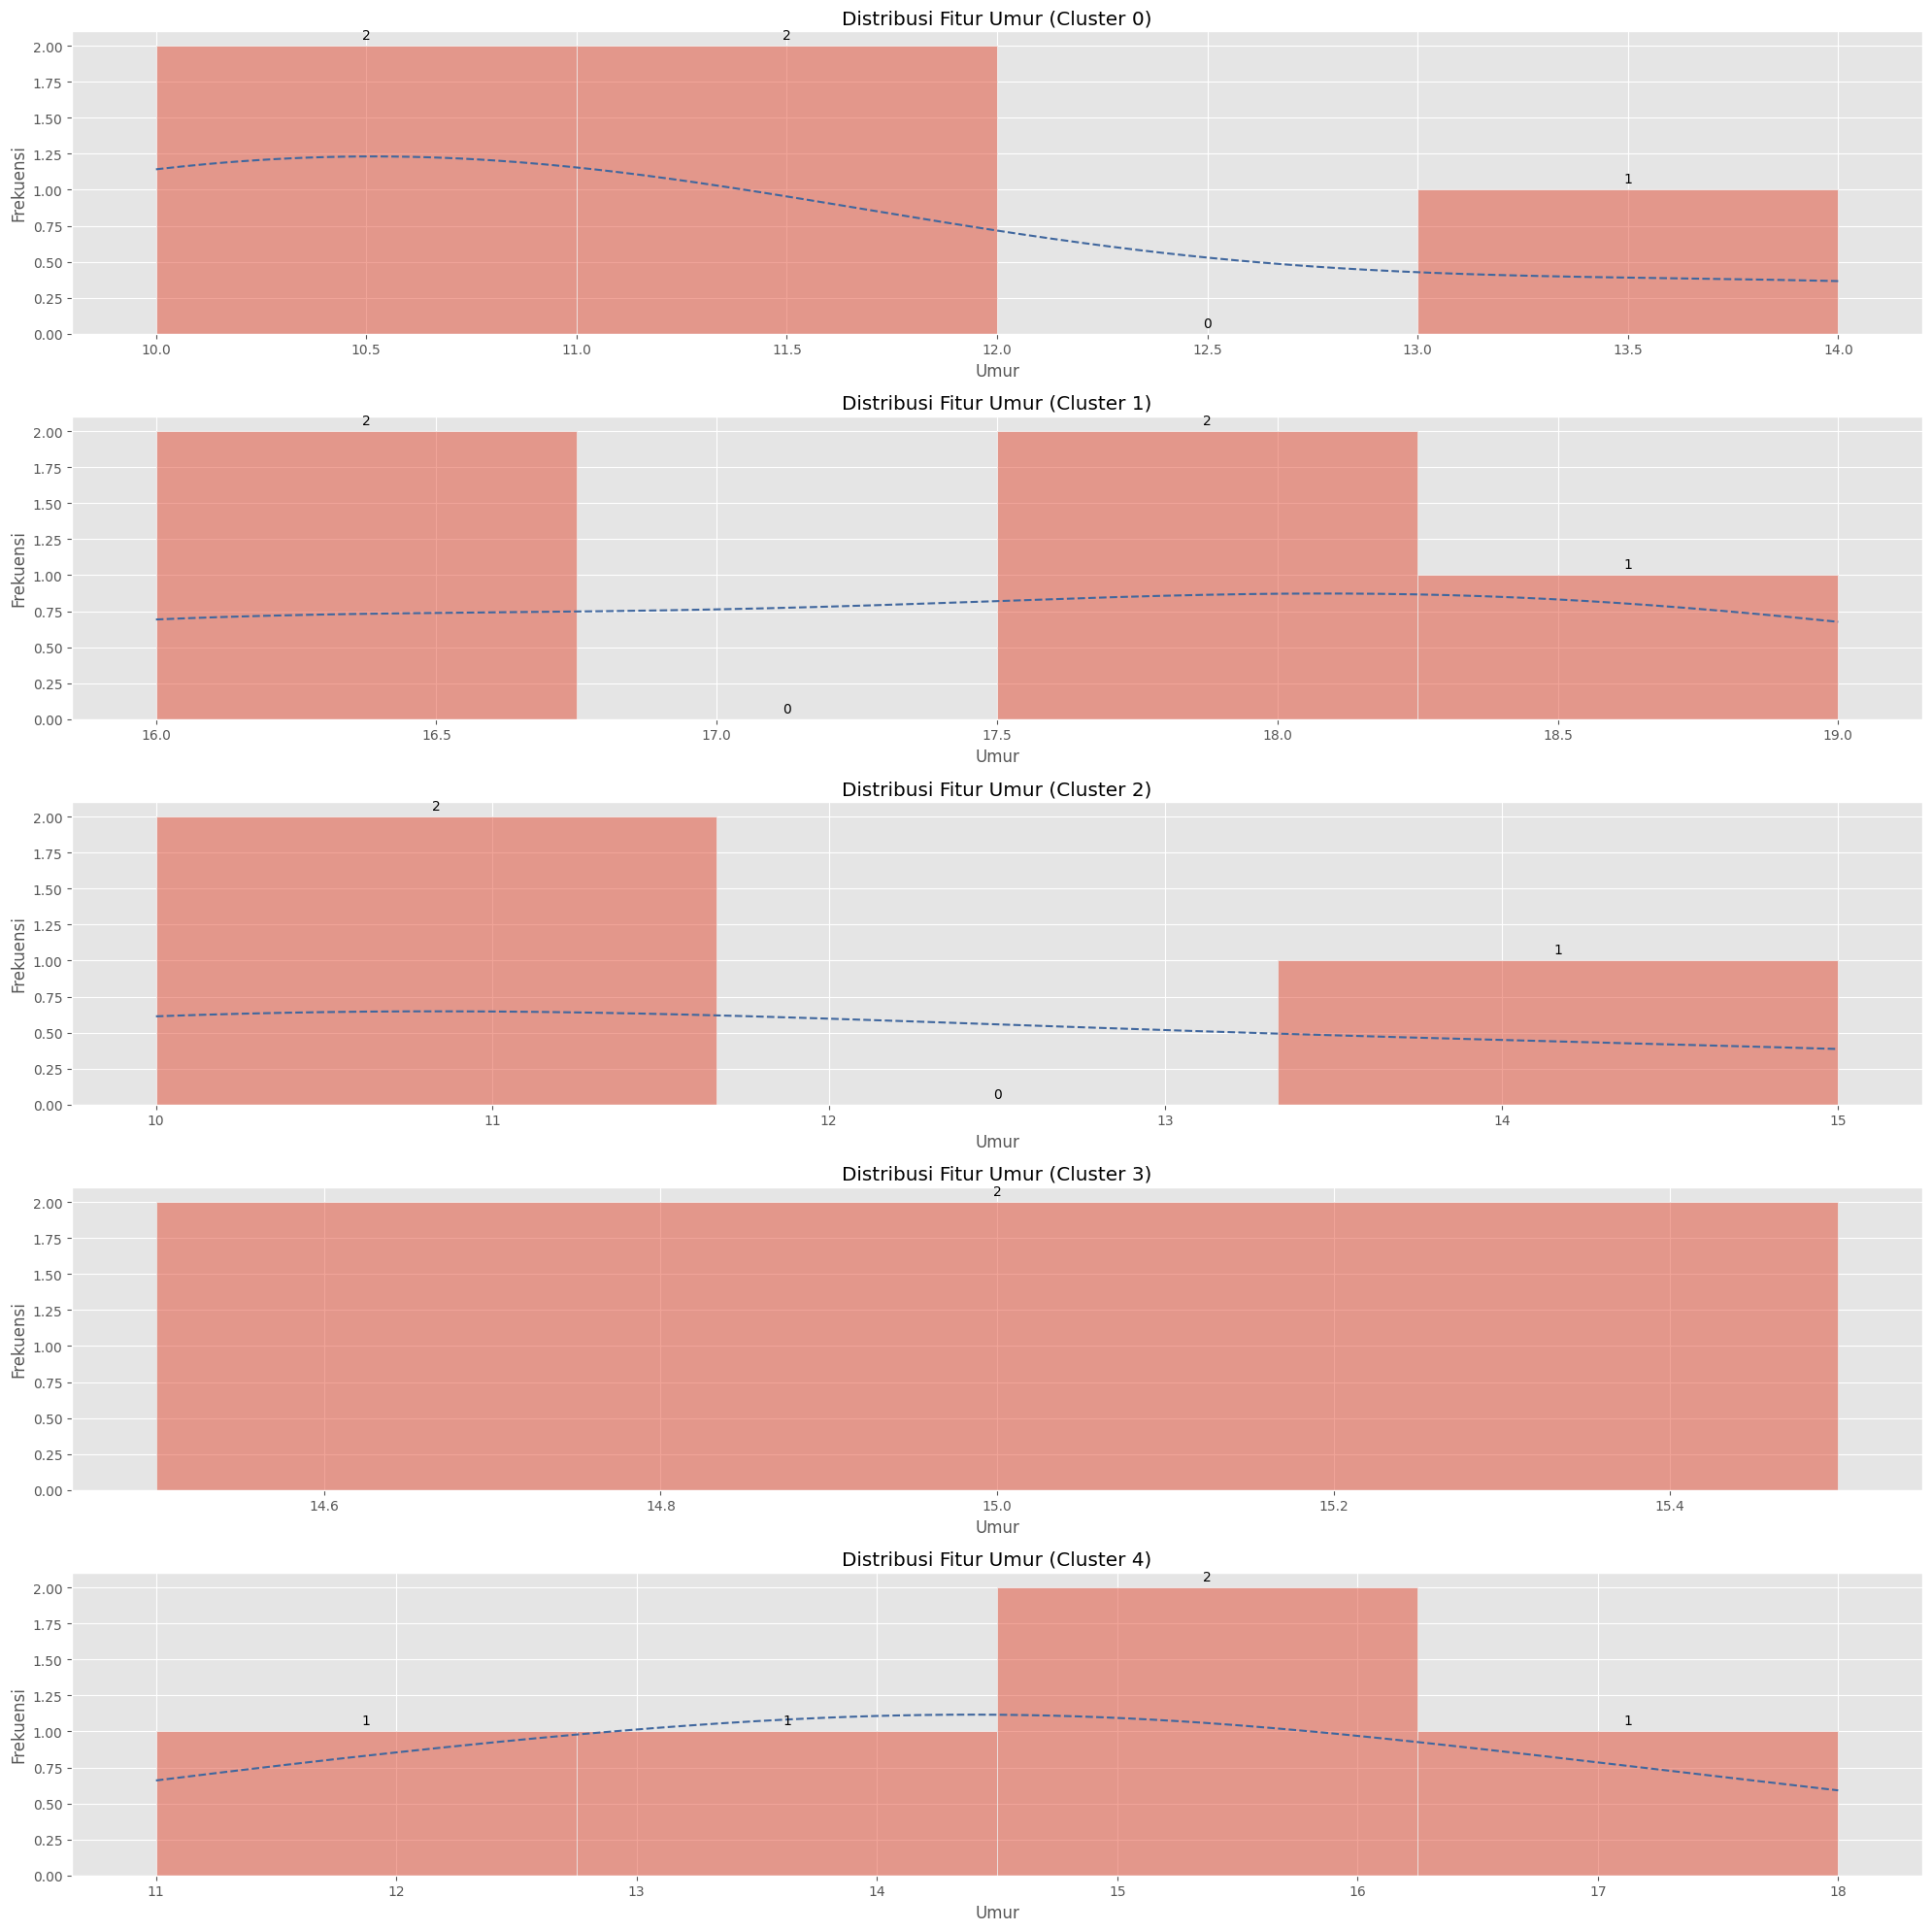

In [23]:
# Iterate through unique values of label_cluster
unique_clusters = np.sort(data_result["label_cluster"].unique())


# Define fig and ax outside the loop
fig, axs = plt.subplots(len(unique_clusters), figsize=(20, 20))

# Iterate through unique values of label_cluster
for i, cluster in enumerate(unique_clusters):
    # Filter data for the current cluster
    cluster_data = data_result[data_result['label_cluster'] == cluster]

    # Plot the histogram for the current cluster on the corresponding ax
    feature = "Umur"
    sns.histplot(data=cluster_data[feature], ax=axs[i], kde=True, stat='count')

    # Customize the KDE line
    try:
        kde_line = axs[i].lines[-1]
        kde_line.set_linestyle('--')
        kde_line.set_color('#40679E')
    except IndexError:
        pass

    # Add text labels to each bar
    for rect in axs[i].patches:
        height = rect.get_height()
        axs[i].annotate(f'{int(height)}',
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),
                        textcoords='offset points',
                        ha='center', va='bottom')

    # Adjust the layout and formatting for the current ax
    axs[i].set_title(f'Distribusi Fitur Umur (Cluster {cluster})')
    axs[i].set_xlabel('Umur')
    axs[i].set_ylabel('Frekuensi')

# Adjust overall layout
plt.tight_layout()
plt.show()

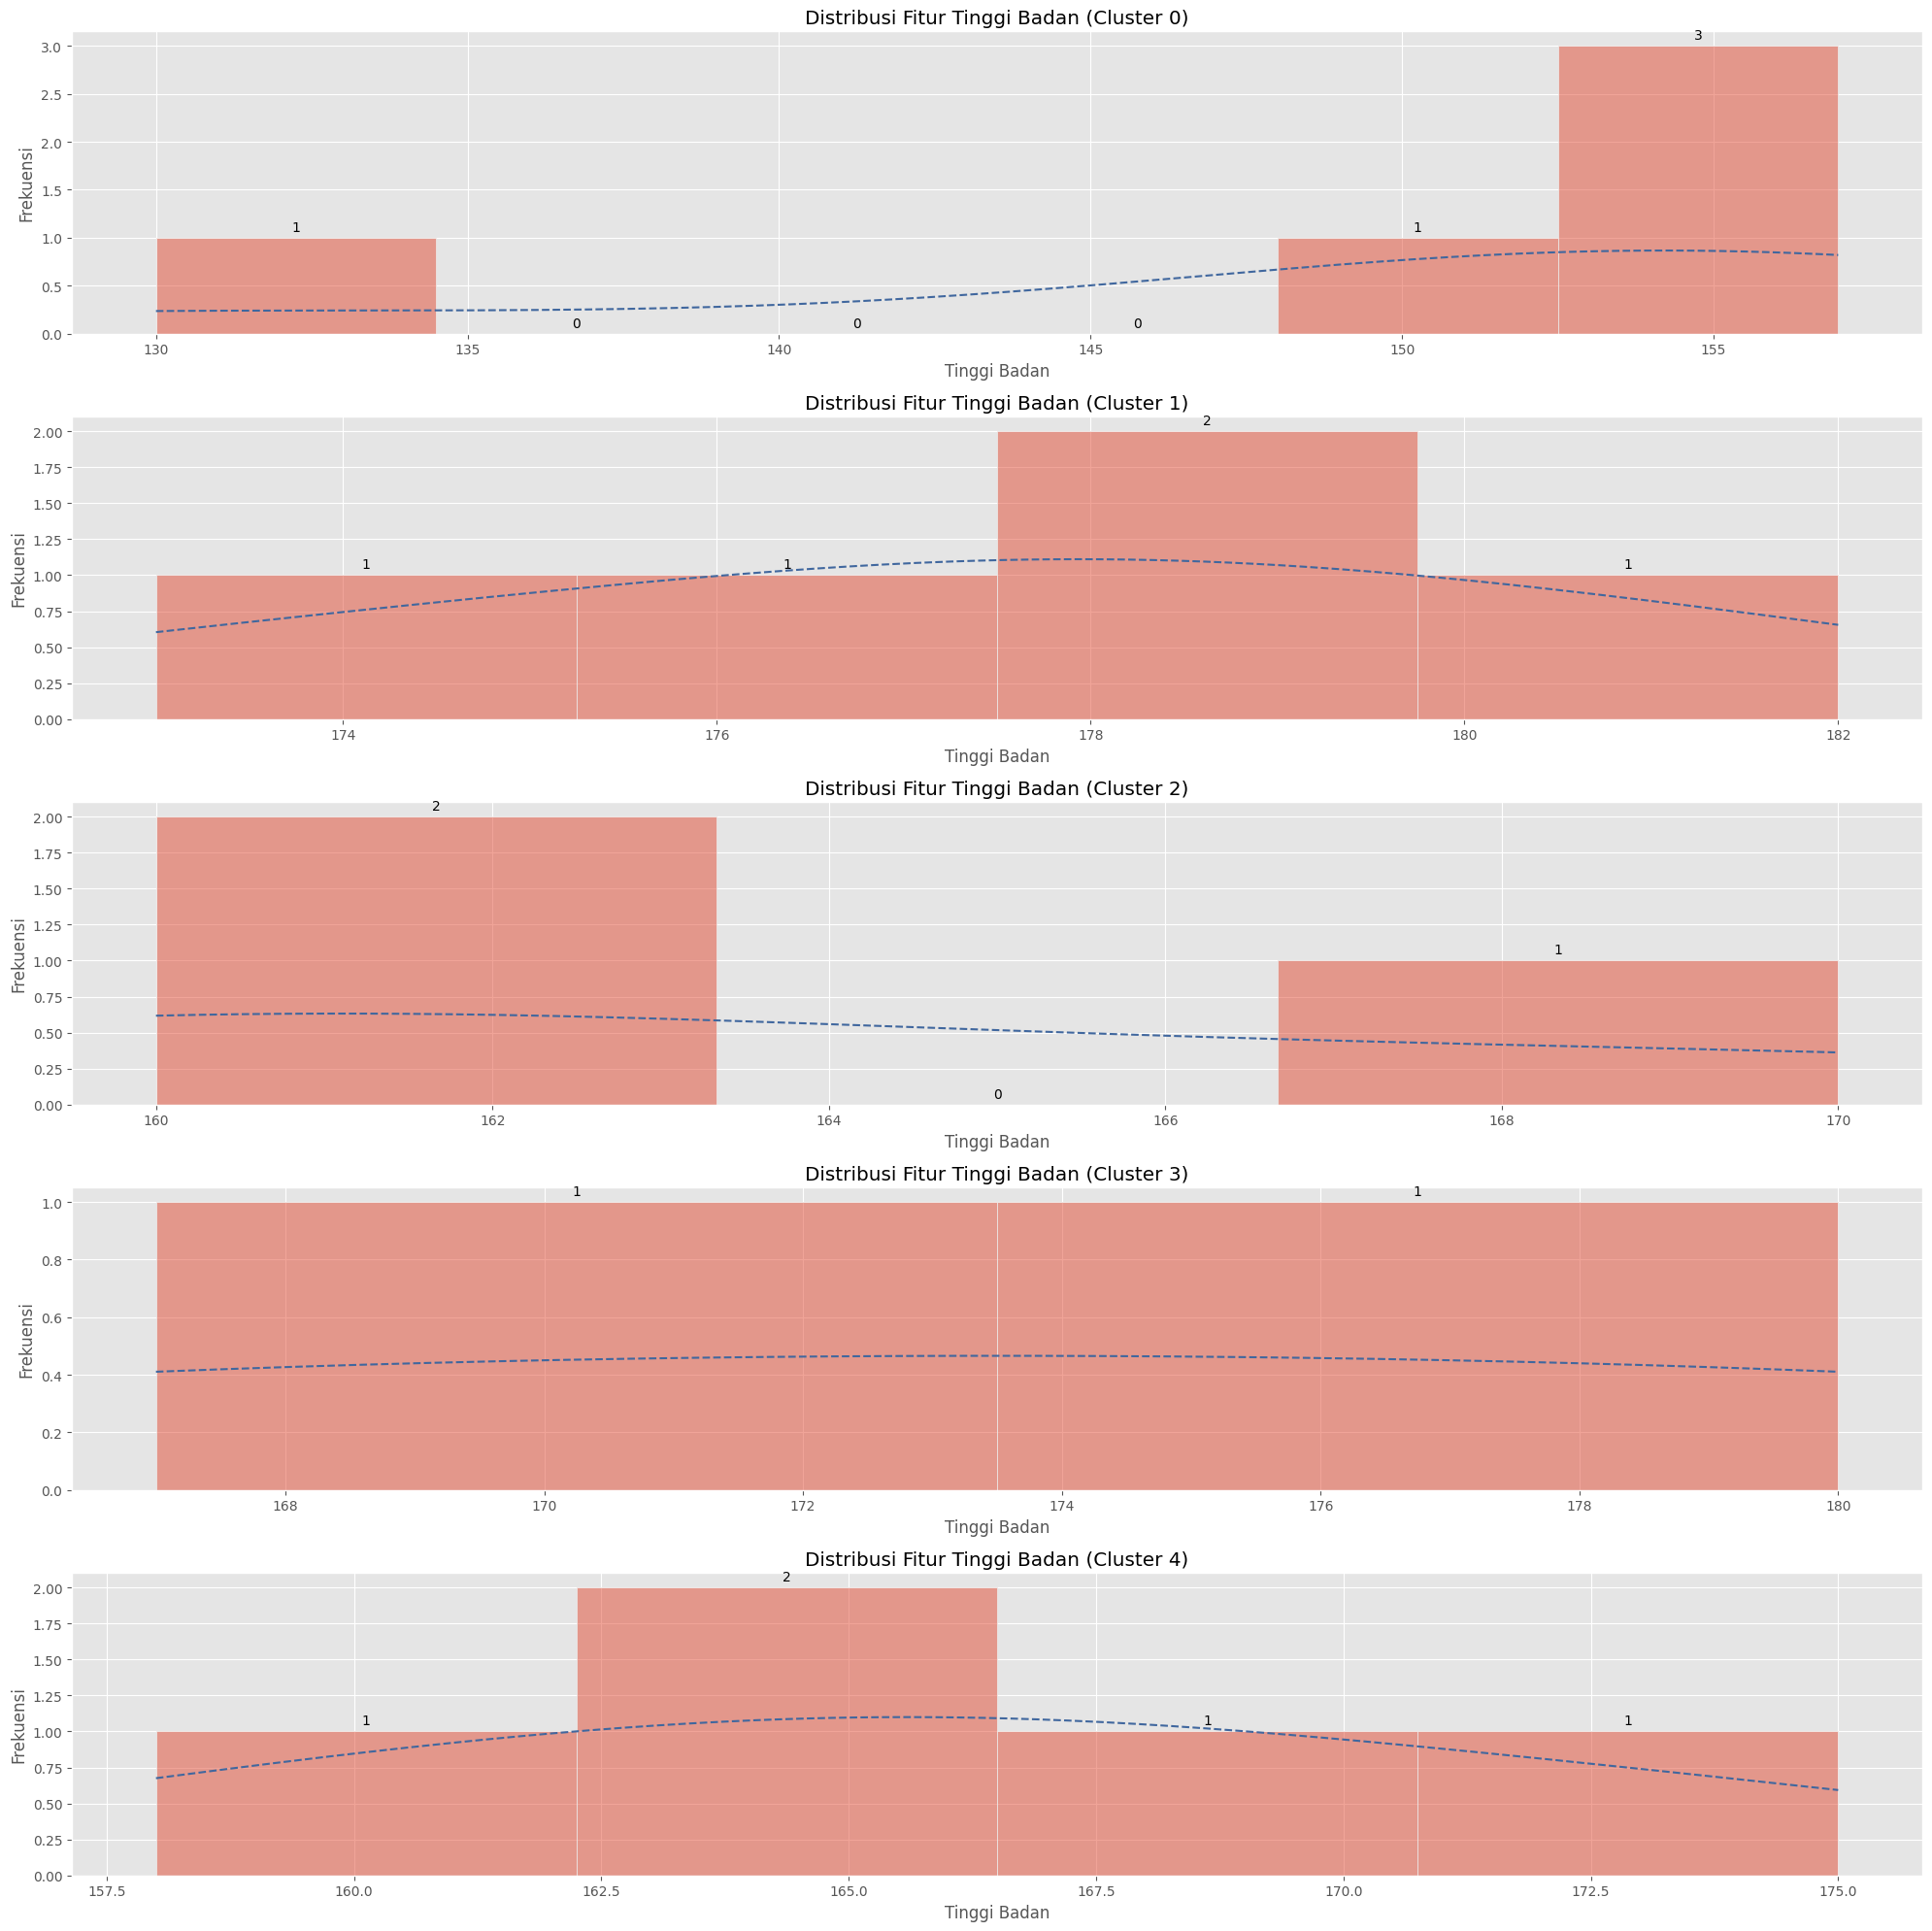

In [24]:
# Iterate through unique values of label_cluster
unique_clusters = np.sort(unique_clusters)

# Define fig and ax outside the loop
fig, axs = plt.subplots(len(unique_clusters), figsize=(20, 20))

# Iterate through unique values of label_cluster
for i, cluster in enumerate(unique_clusters):
    # Filter data for the current cluster
    cluster_data = data_result[data_result['label_cluster'] == cluster]

    # Plot the histogram for the current cluster on the corresponding ax
    feature = "TB"
    sns.histplot(data=cluster_data[feature], ax=axs[i], kde=True, stat='count')

    # Customize the KDE line
    kde_line = axs[i].lines[-1]
    kde_line.set_linestyle('--')
    kde_line.set_color('#40679E')

    # Add text labels to each bar
    for rect in axs[i].patches:
        height = rect.get_height()
        axs[i].annotate(f'{int(height)}',
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),
                        textcoords='offset points',
                        ha='center', va='bottom')

    # Adjust the layout and formatting for the current ax
    axs[i].set_title(f'Distribusi Fitur Tinggi Badan (Cluster {cluster})')
    axs[i].set_xlabel('Tinggi Badan')
    axs[i].set_ylabel('Frekuensi')

# Adjust overall layout
plt.tight_layout()
plt.show()

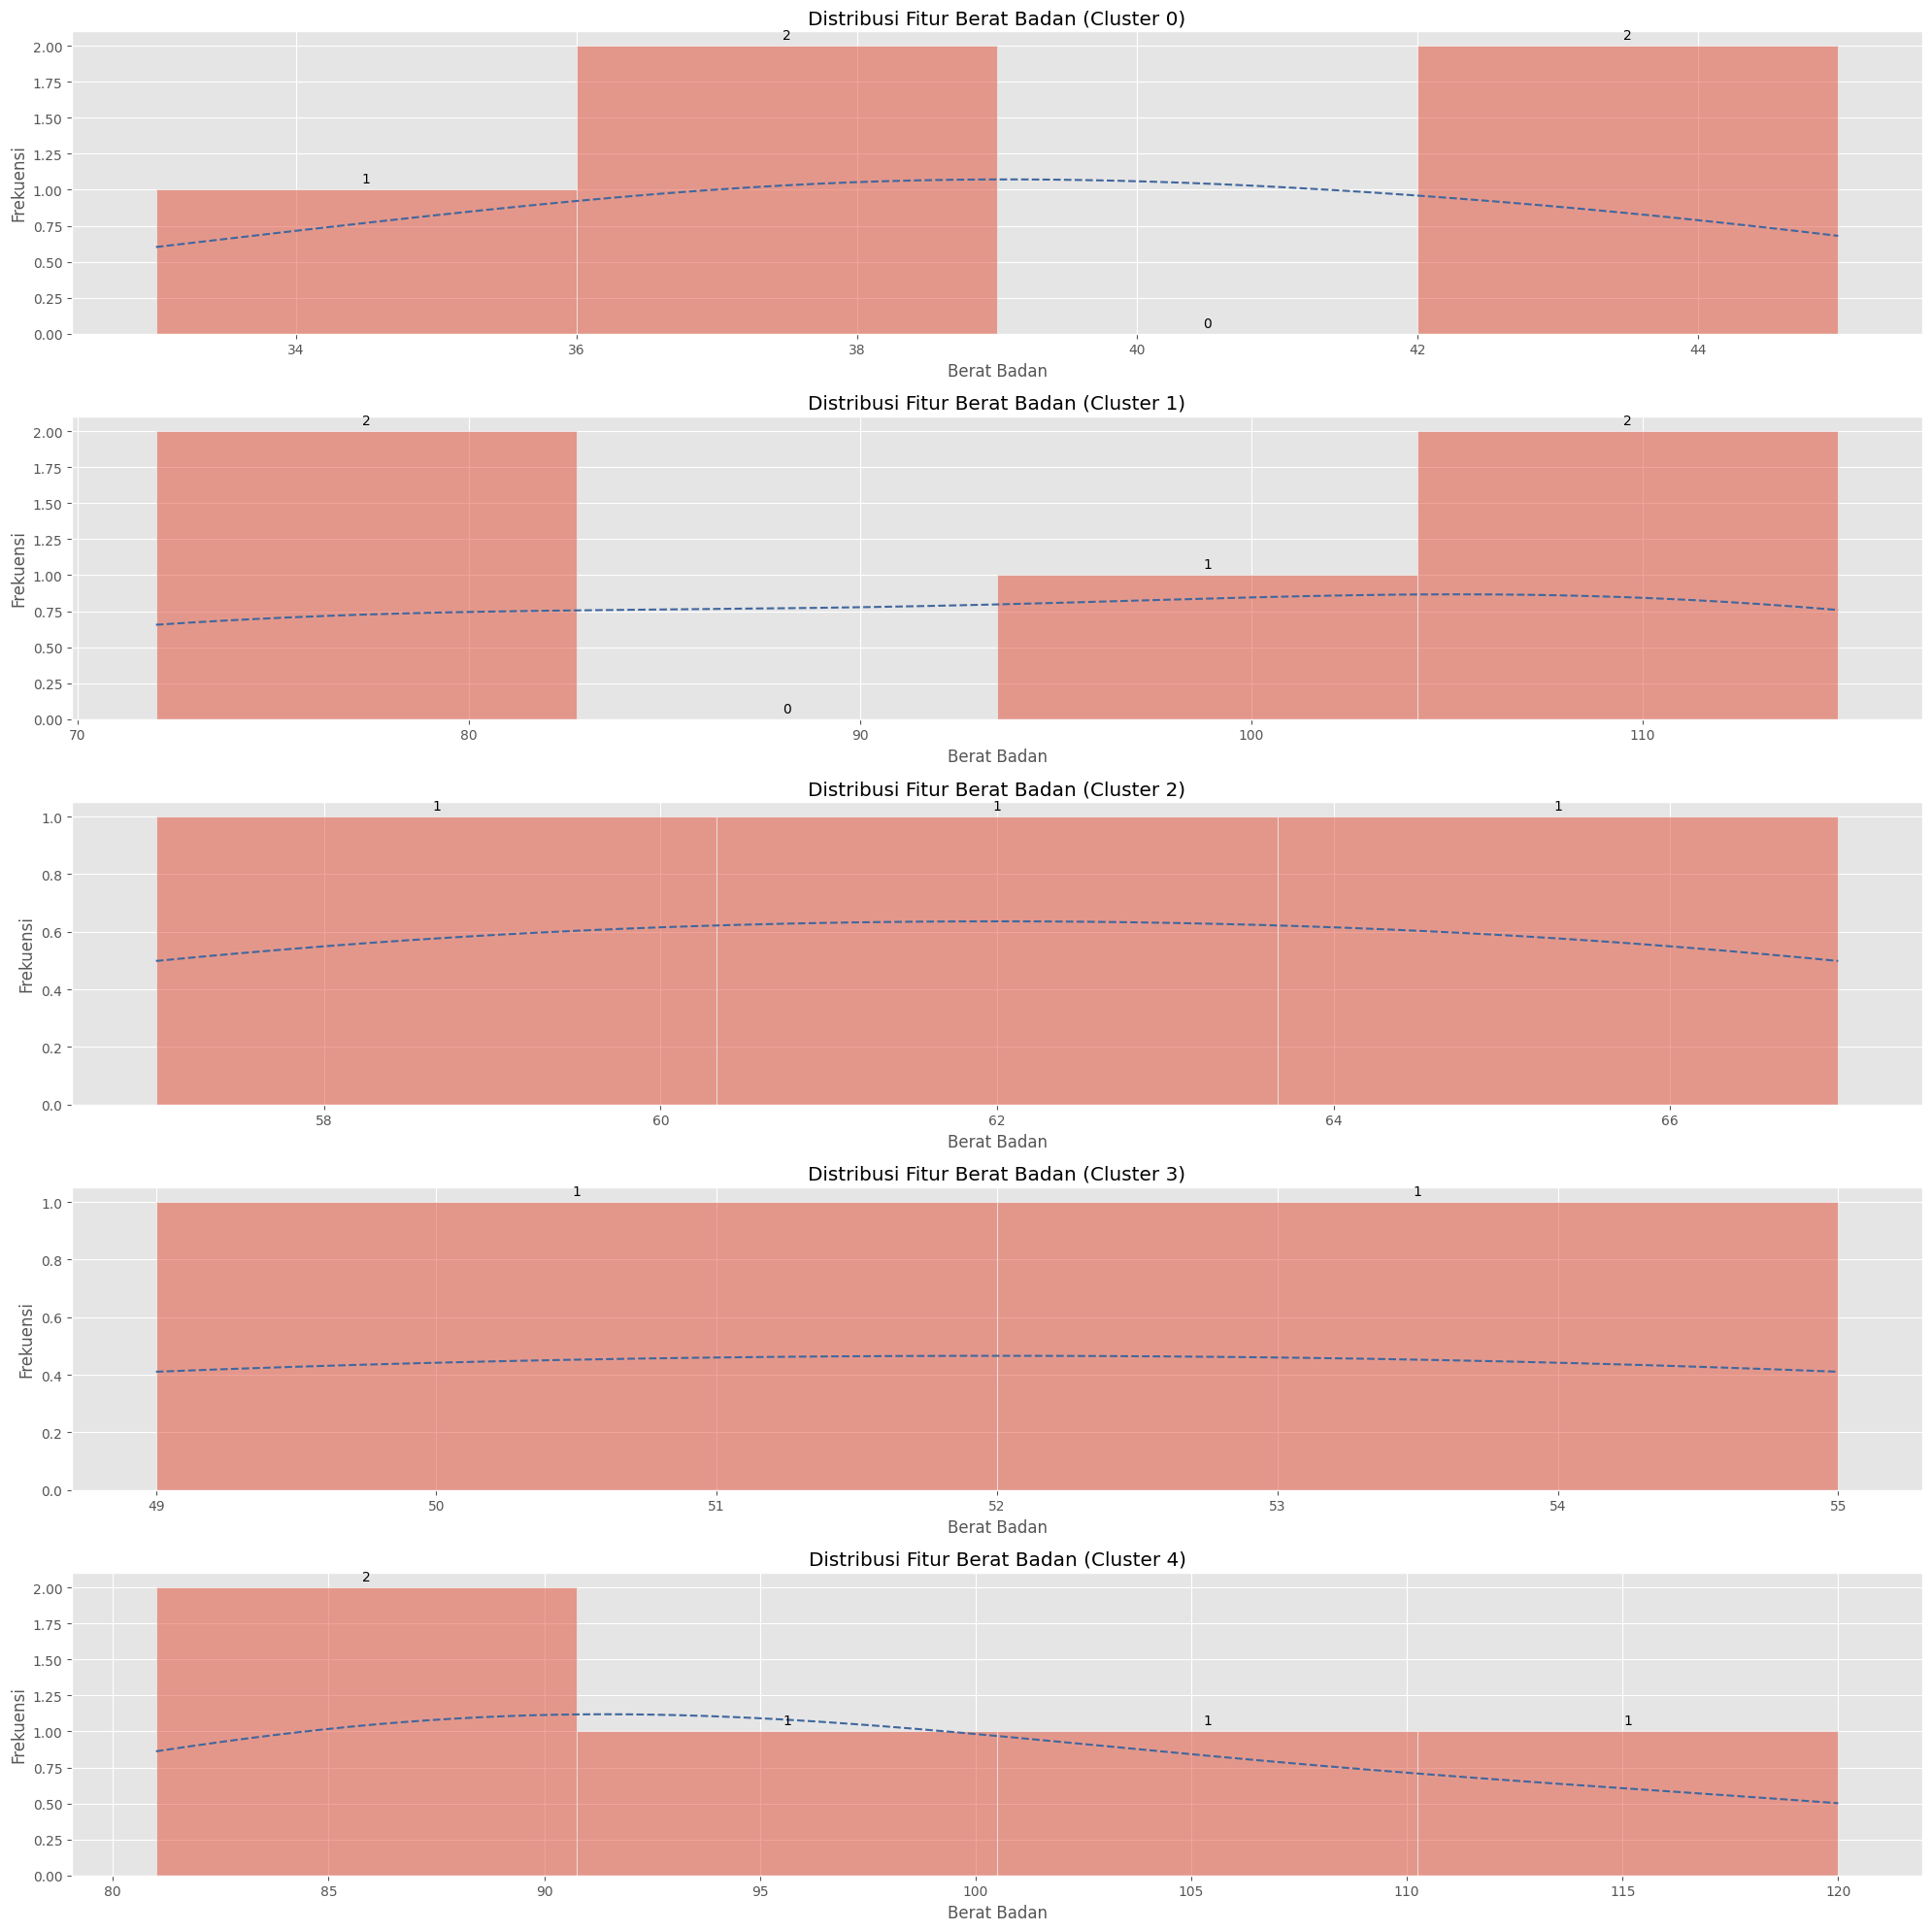

In [25]:
# Iterate through unique values of label_cluster
unique_clusters = np.sort(unique_clusters)

# Define fig and ax outside the loop
fig, axs = plt.subplots(len(unique_clusters), figsize=(20, 20))

# Iterate through unique values of label_cluster
for i, cluster in enumerate(unique_clusters):
    # Filter data for the current cluster
    cluster_data = data_result[data_result['label_cluster'] == cluster]

    # Plot the histogram for the current cluster on the corresponding ax
    feature = "BB"
    sns.histplot(data=cluster_data[feature], ax=axs[i], kde=True, stat='count')

    # Customize the KDE line
    kde_line = axs[i].lines[-1]
    kde_line.set_linestyle('--')
    kde_line.set_color('#40679E')

    # Add text labels to each bar
    for rect in axs[i].patches:
        height = rect.get_height()
        axs[i].annotate(f'{int(height)}',
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),
                        textcoords='offset points',
                        ha='center', va='bottom')

    # Adjust the layout and formatting for the current ax
    axs[i].set_title(f'Distribusi Fitur Berat Badan (Cluster {cluster})')
    axs[i].set_xlabel('Berat Badan')
    axs[i].set_ylabel('Frekuensi')

# Adjust overall layout
plt.tight_layout()
plt.show()